In [ ]:
######################
#import useful modules
######################

import sys

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 


from Modules import *
from Modules_gula import *
########

%matplotlib inline


In [64]:

i,j= 1000,3000
dx,dy = 200,200

simul = load(simul = 'gigatl3_1h ['+ format(j-dy)+','+ format(j+dy)+','+ format(i-dx)+','+ format(i+dx)+',[1,200,1]] 2540', output=False); domain = 'all'

####

iso_file = '/net/omega/local/tmp/1/gula/GIGATL3/GIGATL3_1h/iso/gigatl3_1h_isopycnal_section.02540.nc'


isig = -1
iso = Dataset(iso_file,'r')
sigs = iso.variables['isopycnal'][isig]
u = iso.variables['u'][0,isig,j-dy:j+dy,i-dx:i+dx-1].T
v = iso.variables['v'][0,isig,j-dy:j+dy-1,i-dx:i+dx].T
ow = iso.variables['ow'][0,isig,j-dy:j+dy,i-dx:i+dx].T
vrt = iso.variables['vrt'][0,isig,j-dy:j+dy-1,i-dx:i+dx-1].T
iso.close()


####

u[np.abs(u)>10] == np.nan
v[np.abs(v)>10] == np.nan

masked_array(data=[],
             mask=False,
       fill_value=True,
            dtype=bool)

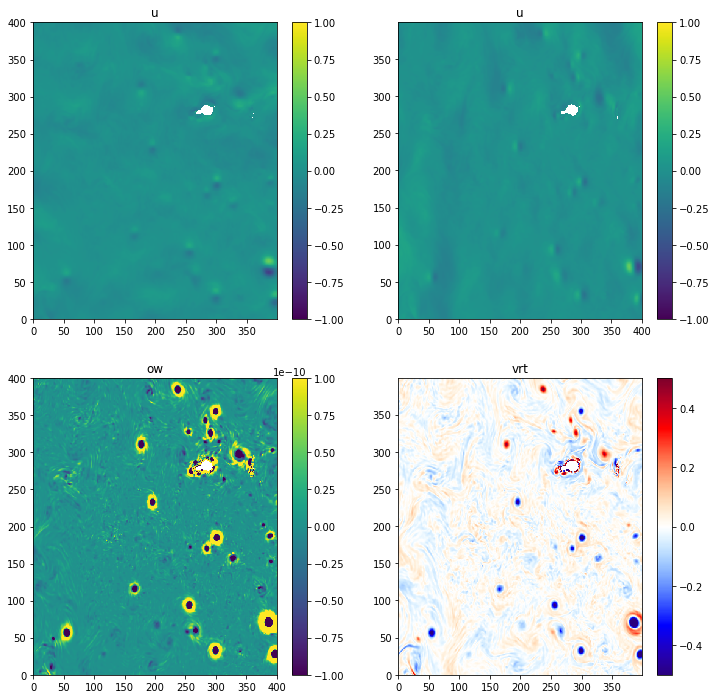

In [65]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.title('u')
plt.pcolormesh(u.T,vmin=-1.,vmax=1.); plt.colorbar()

plt.subplot(222)
plt.title('u')
plt.pcolormesh(v.T,vmin=-1.,vmax=1.); plt.colorbar()


plt.subplot(223)
plt.title('ow')
plt.pcolormesh(ow.T,vmin=-1.e-10,vmax=1.e-10); plt.colorbar()

plt.subplot(224)
plt.title('vrt')
plt.pcolormesh(vrt.T,vmin=-.5,vmax=.5,cmap = plot.ncview_colormap('blu_red'),shading='auto'); plt.colorbar()


In [66]:
# compute a streamfunction using the rotational part:

rot_stream = tools_g.rot2streams(u,v,simul.pm,simul.pn,variable=True) * 1e-4


creating matrix A
using poisson_matrix_fast


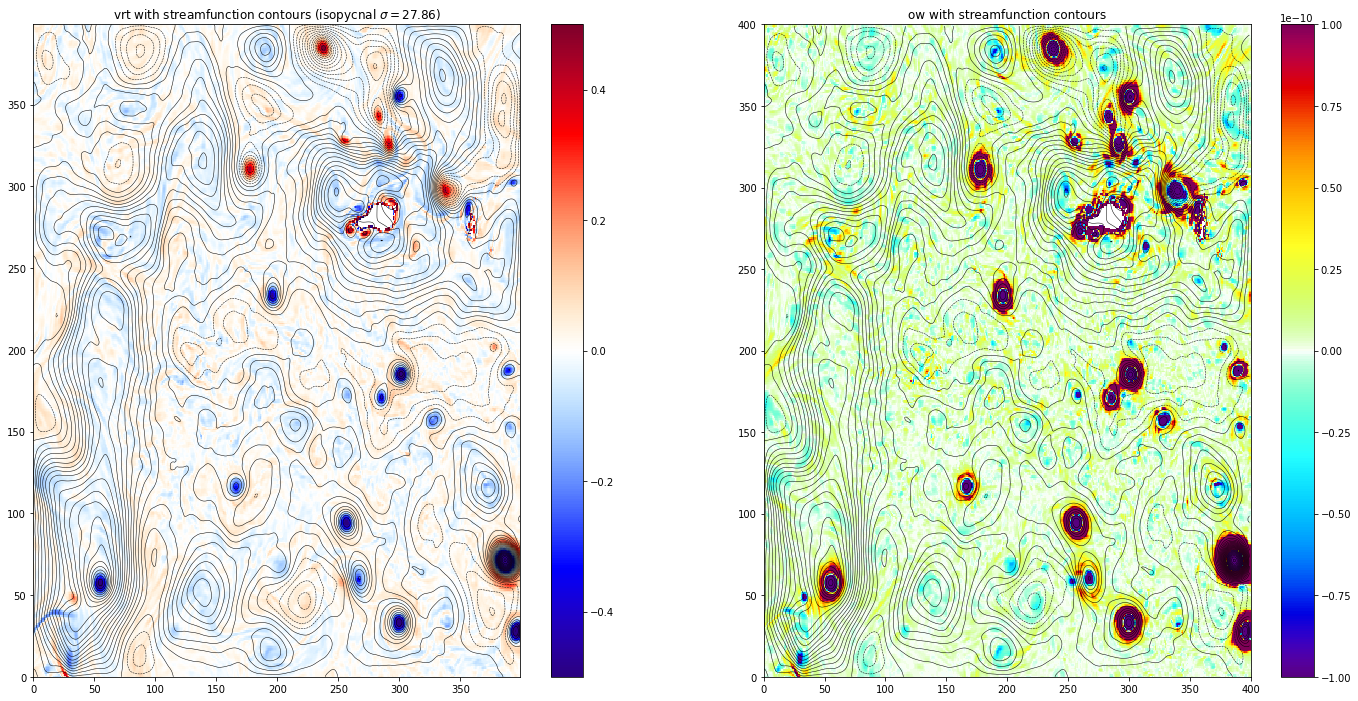

In [67]:
plt.figure(figsize=(24,12))

plt.subplot(121)
plt.title('vrt with streamfunction contours (isopycnal $\sigma = $' +  format(sigs) + ')')
plt.contour(rot_stream.T,50,colors = ('k',), linewidths = (.5,));
#plt.pcolormesh(rot_stream.T,vmin=-1e4,vmax=1e4); plt.colorbar()
plt.pcolormesh(vrt.T,vmin=-.5,vmax=.5,cmap = plot.ncview_colormap('blu_red'),shading='auto'); plt.colorbar()

plt.subplot(122)
plt.title('ow with streamfunction contours')
plt.contour(rot_stream.T,50,colors = ('k',), linewidths = (.5,));
#plt.pcolormesh(rot_stream.T,vmin=-1e4,vmax=1e4); plt.colorbar()
plt.pcolormesh(ow.T,vmin=-1.e-10,vmax=1.e-10,cmap = plot.ncview_colormap('jaisnc'),shading='auto'); plt.colorbar()

plt.savefig('test_streamfunction.png')